In [1]:
from load_data import load_data
from hete_optim import gridsearch_hete_optim_action, hete_optim_action, lelu
import pandas as pd
import numpy as np

def load_data(scenario, directory = '/Users/sweiss/src/hete_net/hete_dgp/created_data/'):
  t = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_t.csv'))
  t_x = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_t_x.csv'))
  x = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_x.csv'))
  y = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_y.csv'))

  t_train = t[:15000]
  t_x_train = t_x[:15000]
  x_train = x[:15000]
  y_train = y[:15000]

  t_test = t[15000:]
  t_x_test = t_x[15000:]
  x_test = x[15000:]
  y_test = y[15000:]

  return([t_train, t_test, t_x_train, t_x_test, x_train, x_test, y_train,y_test])

scenario_number = 1
t_train, t_test, t_x_train, t_x_test, X_train, X_test, y_train,y_test = load_data(scenario_number)


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(array([   6.,   23.,  146.,  336., 1910.,  299.,  221.,   47.,   10.,
           2.]),
 array([-7.22041031, -5.58609198, -3.95177365, -2.31745532, -0.683137  ,
         0.95118133,  2.58549966,  4.21981799,  5.85413632,  7.48845465,
         9.12277297]),
 <a list of 10 Patch objects>)

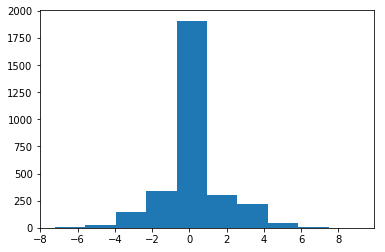

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.hist(t_x_test)

In [52]:
model = hete_optim_action(X_train.shape[1],128,.5, 1, 'relu' )
dummy_y_train = np.concatenate([1-t_train, t_train, y_train], axis = 1)

model.fit([X_train,X_train[:,0]],np.array(dummy_y_train),epochs = 50)

Epoch 1/50
15000/15000 [==============================] - 1s 91us/step - loss: -0.1613
Epoch 2/50
15000/15000 [==============================] - 1s 63us/step - loss: -0.1680
Epoch 3/50
15000/15000 [==============================] - 1s 58us/step - loss: -0.1751
Epoch 4/50
15000/15000 [==============================] - 1s 56us/step - loss: -0.1831
Epoch 5/50
15000/15000 [==============================] - 1s 57us/step - loss: -0.1891
Epoch 6/50
15000/15000 [==============================] - 1s 57us/step - loss: -0.1931
Epoch 7/50
15000/15000 [==============================] - 1s 57us/step - loss: -0.2005
Epoch 8/50
15000/15000 [==============================] - 1s 56us/step - loss: -0.2067
Epoch 9/50
15000/15000 [==============================] - 1s 58us/step - loss: -0.2152
Epoch 10/50
15000/15000 [==============================] - 1s 58us/step - loss: -0.2201
Epoch 11/50
15000/15000 [==============================] - 1s 60us/step - loss: -0.2275
Epoch 12/50
15000/15000 [================

0.3491655969191271
0.2933425797503467


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


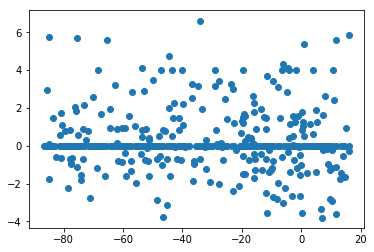

In [51]:
predictions = model.predict([X_test,X_test[:,0]])
print(y_test[np.where(predictions[:,1]>.5)[0]].mean())
print(y_test[np.where(predictions[:,0]>.5)[0]].mean())
plt.scatter(np.log(predictions[:,0]/(1-predictions[:,0])), t_x_test)

In [49]:
np.where(predictions[:,0]>0)[0]

array([   0,    1,    2, ..., 2997, 2998, 2999])

In [40]:


model = gridsearch_hete_optim_action(X_train, t_train, y_train)


predictions = model.predict([X_test,X_test[:,0]])
pd.DataFrame(predictions).to_csv('/Users/sweiss/src/hete_net/hete_dgp/predicted_data_hete_net/hete_preds_optim_'+str(scenario_number)+'.csv')


Epoch 1/50
10000/10000 [==============================] - 1s 67us/step - loss: -0.1563
Epoch 2/50
10000/10000 [==============================] - 0s 40us/step - loss: -0.1603
Epoch 3/50
10000/10000 [==============================] - 0s 43us/step - loss: -0.1621
Epoch 4/50
10000/10000 [==============================] - 0s 40us/step - loss: -0.1695
Epoch 5/50
10000/10000 [==============================] - 0s 41us/step - loss: -0.1738
Epoch 6/50
10000/10000 [==============================] - 0s 40us/step - loss: -0.1812
Epoch 7/50
10000/10000 [==============================] - 0s 40us/step - loss: -0.1885
Epoch 8/50
 1824/10000 [====>.........................] - ETA: 0s - loss: -0.1892

KeyboardInterrupt: 

In [59]:
from hete_net_interactions import gridsearch_hete_model, hete_model
mode , base= hete_model(X_train.shape[1], 256, .5)

In [61]:
X_train_control = X_train.copy()
X_train_control[:,0] = np.unique(X_train_control[:,0])[0]
mode.fit([X_train,X_train_control], y_train , epochs = 50)

Epoch 1/50
15000/15000 [==============================] - 1s 88us/step - loss: 0.1894
Epoch 2/50
15000/15000 [==============================] - 1s 90us/step - loss: 0.1679
Epoch 3/50
15000/15000 [==============================] - 1s 88us/step - loss: 0.1548
Epoch 4/50
15000/15000 [==============================] - 1s 94us/step - loss: 0.1501
Epoch 5/50
15000/15000 [==============================] - 1s 90us/step - loss: 0.1441
Epoch 6/50
15000/15000 [==============================] - 1s 87us/step - loss: 0.1383
Epoch 7/50
15000/15000 [==============================] - 1s 89us/step - loss: 0.1358
Epoch 8/50
15000/15000 [==============================] - 1s 87us/step - loss: 0.1305
Epoch 9/50
15000/15000 [==============================] - 1s 89us/step - loss: 0.1272
Epoch 10/50
15000/15000 [==============================] - 1s 88us/step - loss: 0.1226
Epoch 11/50
15000/15000 [==============================] - 1s 87us/step - loss: 0.1183
Epoch 12/50
15000/15000 [===========================

In [69]:
X_train_tmt = X_test.copy()
X_train_tmt[:,0] = np.unique(X_train[:,0])[1]

X_train_control = X_test.copy()
X_train_control[:,0] = np.unique(X_train[:,0])[0]

pred_1 = mode.predict([X_train_tmt,X_train_control])

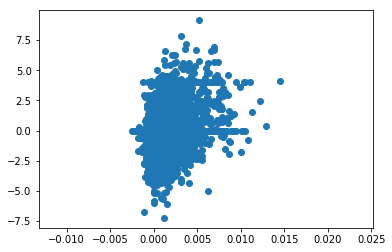

In [70]:
plt.scatter(pred_1, t_x_test)

(array([  90., 1094.,  972.,  512.,  202.,   74.,   42.,   10.,    2.,
           2.]),
 array([-0.00251145, -0.00080794,  0.00089557,  0.00259907,  0.00430258,
         0.00600609,  0.0077096 ,  0.0094131 ,  0.01111661,  0.01282012,
         0.01452363]),
 <a list of 10 Patch objects>)

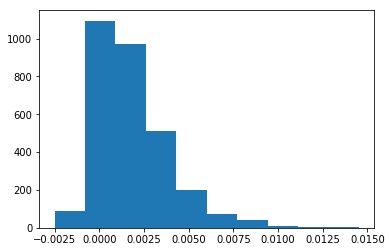

In [71]:
plt.hist(pred_1)